<div dir='rtl'>
    
# بخش دوم

</div>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

<div dir=rtl>
  در این مرحله دیتاست را دریافت می کنیم .
</div>

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4431872/4422102 [==============================] - 5s 1us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [8]:
x_train = x_train.reshape(len(x_train),28, 28, 1).astype( 'float32' )
input_data = x_train/ 255.0
x_test = x_test.reshape(len(x_test),28, 28, 1).astype( 'float32' )
test_input_data = x_test/ 255.0

In [9]:
import matplotlib.pyplot as plt

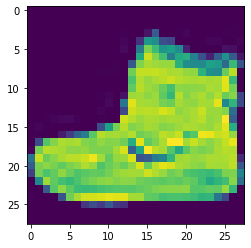

In [11]:
plt.imshow(x_train[0])

<div dir=rtl>
  داده ها را به صورت نامینال لیبل گذاری می کنیم .
</div>

In [13]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [14]:
lb = preprocessing.LabelBinarizer()
label_data = lb.fit_transform(y_train)
test_output_data = lb.transform(y_test)
print(lb.classes_)

[0 1 2 3 4 5 6 7 8 9]


<div dir=rtl>
 مدل را ایجاد می کنیم 
</div>

In [15]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

In [16]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 256)               4

2022-05-20 22:17:37.905944: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-20 22:17:37.906044: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mohammad-HP-Laptop-15-da0xxx): /proc/driver/nvidia/version does not exist
2022-05-20 22:17:37.907417: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
results = model.fit(input_data, label_data, 
                             validation_split=0.1, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 66s 39ms/step - loss: 0.2327 - accuracy: 0.9137 - val_loss: 0.2408 - val_accuracy: 0.9097
Epoch 2/5
1688/1688 [==============================] - 54s 32ms/step - loss: 0.2172 - accuracy: 0.9200 - val_loss: 0.2317 - val_accuracy: 0.9132
Epoch 3/5
1688/1688 [==============================] - 50s 30ms/step - loss: 0.2059 - accuracy: 0.9241 - val_loss: 0.2247 - val_accuracy: 0.9177
Epoch 4/5
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1929 - accuracy: 0.9285 - val_loss: 0.2257 - val_accuracy: 0.9170
Epoch 5/5
1688/1688 [==============================] - 53s 31ms/step - loss: 0.1806 - accuracy: 0.9334 - val_loss: 0.2204 - val_accuracy: 0.9197


<div dir=rtl>
    
###### نمودار صحت

</div>

Text(0.5, 1.0, 'model accuracy')

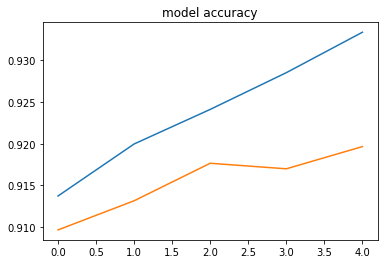

In [20]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')

<div dir=rtl>
    
###### نمودار خطا

</div>

Maximum Loss : 0.2327

Minimum Loss : 0.1806

Loss difference : 0.0520


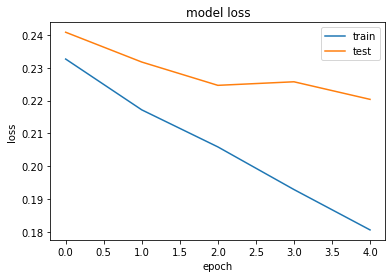

In [21]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

In [22]:
predictions = model.predict(test_input_data)
print(predictions[0])

[1.2318710e-10 1.2714266e-09 1.6154944e-10 4.9491816e-10 2.1102211e-12
 2.0220151e-07 4.4137727e-10 7.8645797e-05 5.3117127e-10 9.9992120e-01]


In [23]:
label_ = [np.argmax(i) for i in predictions]
print('first clothing item')
print('Predicted label: {}'.format(label_[0]))
print('Correct label  :   {}'.format(y_test[0]))

first clothing item
Predicted label: 9
Correct label  :   9


In [25]:
correctly_classified = []
incorrectly_classified = []
index = 0
for actual, predict in zip(y_test, label_):
    if actual == predict:
        correctly_classified.append(index)
    else:
        incorrectly_classified.append(index)
    index += 1
c1 = len(correctly_classified)
i1 = len(incorrectly_classified)
print('Correctly classified   : {:5d} ({:=5.2f} %)'.format(c1, c1 * 100 / (c1 + i1)))    
print('Incorrectly classified : {:5d} ({:=5.2f} %)'.format(i1, i1 * 100 / (c1 + i1)))    

Correctly classified   :  9139 (91.39 %)
Incorrectly classified :   861 ( 8.61 %)


In [28]:
import seaborn as sb

In [27]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 701.4 kB/s eta 0:00:000:00:01m eta 0:00:01


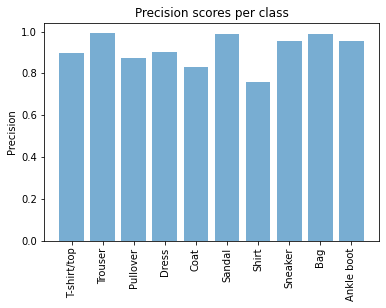

In [35]:
precision_scores = precision_score(y_test, label_, average=None)
y_pos = np.arange(len(precision_scores))
plt.bar(y_pos, precision_scores, align='center', alpha=0.6)
plt.xticks(y_pos, class_name, rotation=90)
plt.ylabel('Precision')
plt.title('Precision scores per class')
plt.show()

In [41]:
print(f'accuracy score = {accuracy_score(y_test, label_)}%')

accuracy score = 0.9139%


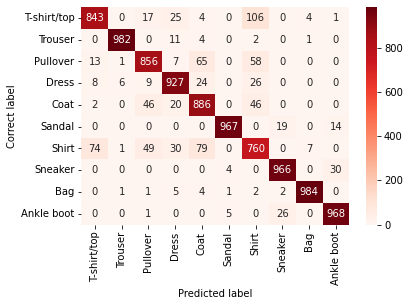

In [33]:
conf_matrix = confusion_matrix(y_test, label_)

ax = sb.heatmap(conf_matrix, 
            cmap='Reds', xticklabels=class_name, 
            yticklabels=class_name,
            annot=True, fmt='d')

plt.xlabel('Predicted label') 
plt.ylabel('Correct label') 

plt.show()
